# Impulssatz {#sec-impuls}

[Aufgabenstellung](calculations/EMS_%C3%9Cbungen_1-2.pdf)

## Rahmen mit einem Freiheitsgrad - ungedämpfte freie Schwingung

![Statisches System](pictures/ems_rahmen_2.jpg){#fig-stat_system_ems_rahmen}

In [1]:
import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit

import matplotlib.pyplot as plt

In [2]:
EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m,  H, f_y, t, F_max, t_1, t_2,W_el_y = sp.symbols('EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m_, H, f_y, t, F_max, t_1, t_2 W_el_y')


u = sp.Function('u')(t)

## Parameter der Aufgabenstellung

In [3]:
params_not_relevant = {
    'EA_riegel':sp.oo,
    'EI_riegel':sp.oo,
    'EA_stuetze':sp.oo,
}

render.dict_render(params_not_relevant)

Eq(EA_riegel, oo)

Eq(EI_riegel, oo)

Eq(EA_stuetze, oo)

In [4]:
params = {              
          'EI_stuetze':23646000.0*unit.N*unit.m**2,
          'm_':5000*unit.N*unit.second**2/unit.m,
          'W_el_y':938*10**3*unit.mm**3,
          'H':3000*unit.mm,
          'F_max':1000*10**3*unit.N,
          't_1':0.003*unit.second,
          't_2':0.006*unit.second,
          'f_y':355*unit.N/unit.mm**2,
          'u_0':0.0
          }

params_plot = convert.param_value(params=params)
render.dict_render(params)

Eq(EI_stuetze, 23646000.0*meter**2*newton)

Eq(m_, 5000*newton*second**2/meter)

Eq(W_el_y, 938000*millimeter**3)

Eq(H, 3000*millimeter)

Eq(F_max, 1000000*newton)

Eq(t_1, 0.003*second)

Eq(t_2, 0.006*second)

Eq(f_y, 355*newton/millimeter**2)

Eq(u_0, 0.0)

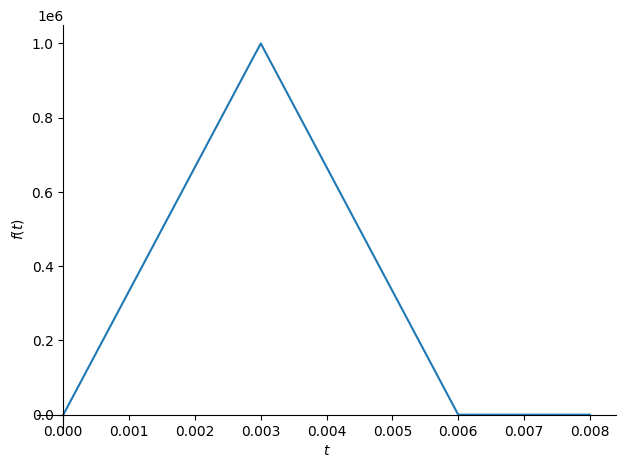

In [5]:
#| label: fig-lastfunktion
#| fig-cap: "Lastfunktion"


F_1 = t*F_max / t_1 
F_2 =  F_1.subs(t,t_1)-((t-t_1)*F_max / t_1)
F_t = sp.Piecewise((F_1,t<t_1), (F_2,t<=t_2), (0, t>t_2))
sp.plot(F_t.subs(params_plot), (t,0,0.008))
plt.show()


## Horizontale Steifigkeit

Die horizontale Steifigkeit des Systems lässt sich mittels der Formel für Rahmen bestimmen.

$$k_{Stütze} = \frac{12EI_{Stütze}}{H^3}$$

Diese gilt für eine einzelne Stütze.


In [6]:
EI_stuetze.subs(EI_stuetze, params['EI_stuetze'])


23646000.0*meter**2*newton

In [7]:
k = 2 * 12 * EI_stuetze / H**3

render.eq_display('k_', k,
                  'k_', k.subs(params).simplify().evalf(3))

Eq(k_, 24*EI_stuetze/H**3)

Eq(k_, 2.1e+7*newton/meter)

## Eigenkreisfrequenz

In [8]:
omega_n = sp.sqrt(k/m)

render.eq_display('omega_n', 'sqrt(k/m)',
                  'omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

Eq(omega_n, sqrt(k/m))

Eq(omega_n, 2*sqrt(6)*sqrt(EI_stuetze/(H**3*m_)))

Eq(omega_n, 64.8/second)

## Bewegungsgleichung

Die Bewegungsgleichung für einen ungedämpften Einmassenschwinger ist die folgende:

$$m u(t)'' + k u(t) = F(t)$$


### Approximation der Lösung

Es handelt sich um eine inhomogene Differentialgleichung 2.Ordnung. Auf die exakte Lösung der Gleichung wird nicht eingegangen. Es wird versucht die bemessungsrelevanten Parameter näherungsweise zu bestimmen. Dies lässt sich mit dem Impulssatz approximieren. 

$$ F \Delta t = m \Delta v$$

Dieser besagt, dass die einwirkende Kraft $F$ im betrachteten Zeitabschnitt $\Delta t$ der Masse $m$ multipliziert mit der Geschwindigkeitsänderung $\Delta v$ des Objekts entspricht. Für eine kurze Anregung, wie im Beispiel der Fall ist, kann die Anfangsgeschwindigkeit wie folgt bestimmt werden:

$$ v_0 = \frac{I}{m}$$

$$I = \int_{0}^{t_2} F(t) \,dt $$

In [9]:
I = sp.integrate(F_t.subs(params), (t,0,t_2.subs(params)))
v_0 = I / m

## Die Anfangsgeschwindigkeit wird zum Params dict hinzugefügt
params['v_0'] = v_0.subs(params)
params_plot = convert.param_value(params)


render.eq_display('I_', I,
                  'v_0', v_0,
                  'v_0', v_0.subs(params))

Eq(I_, 3000.0*newton*second)

Eq(v_0, 3000.0*newton*second/m_)

Eq(v_0, 0.6*meter/second)

Durch die Impuls-Betrachtung vereinfacht sich die Bewegungsgleichung zu:


$$m u(t)'' + k u(t) = 0$$

Mit der Anfangsgeschwindigkeit als Randbedingung. Als Ansatzfunktion zur Lösung der homogenen Differentialgleichung dient die folgende Gleichung:

$$u(t) = A_1 \cos(\omega_n t) + A_2 \sin(\omega_n t)$$


In [10]:
A_1, A_2,u_0 = sp.symbols('A_1:3 u_0')

bewegungsgleichung = m*sp.diff(u,t,2) + k*u
ansatzfunktion = sp.Eq(u,A_1 * sp.cos(omega_n*t) + A_2*sp.sin(omega_n*t))
eq_randbedingung_1 = sp.Eq(u_0,ansatzfunktion.rhs.subs(t,0))
eq_randbedingung_2 = sp.Eq(v_0, sp.diff(ansatzfunktion.rhs,t).subs(t,0))
A_solve = sp.solve([eq_randbedingung_1, eq_randbedingung_2],[A_1, A_2],dict=True)[0]


u_t = ansatzfunktion.subs(A_solve)
u_t.subs(params).simplify().evalf(3)


Eq(u(t), 0.00925*meter*sin(64.8362038781832*t/second))

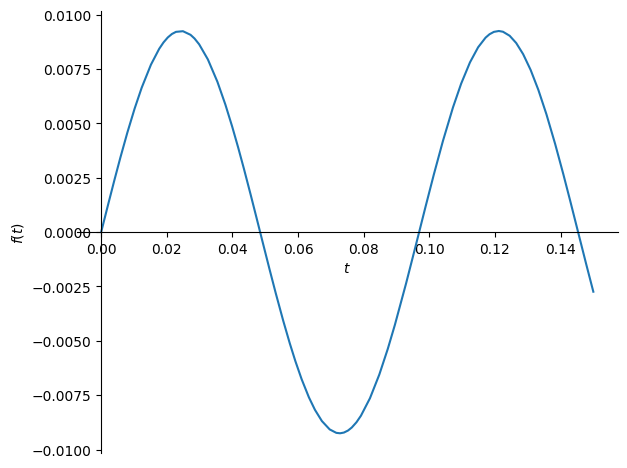

In [11]:
#| label: fig-bewegungsfunk
#| fig-cap: "Bewegungsfunktion"

u_t_plot = u_t.subs(params_plot).rhs/unit.N/unit.second
sp.plot(u_t_plot, (t,0,0.15))

plt.show()


## Rückstellkraft

Anhand der maximalen Amplitude lässt sich die maximale Rückstellkraft für den gesamten Rahmen bestimmen.

$$F_R = k   u = k   A$$



In [12]:
t_max = sp.solve(sp.Eq(sp.diff(u_t.rhs,t),0),t)
u_max = u_t.subs(t, t_max[0].subs(params_plot)*unit.second).subs(params).rhs

F_R = k * u_max

render.eq_display('u_max', 'A',
                  'A', u_max.simplify().evalf(3),
                  'F_R', F_R.subs(params).simplify().evalf(3))

Eq(u_max, A)

Eq(A, 0.00925*meter)

Eq(F_R, 1.95e+5*newton)

### Spannungsnachweis

Die Rückstellkraft wirkt im Zentrum der Masse.

In [13]:
M_max = F_R/2 * H

sigma_max = M_max /W_el_y

render.eq_display('M_max', 'F_R /2 * H',
                  'M_max', M_max.subs(params).simplify().evalf(3),
                  'sigma_max', 'M_max / W_el_y',
                  'sigma_max', unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm),
                  'Nachweis', unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm)<f_y)

Eq(M_max, F_R*H/2)

Eq(M_max, 2.92e+5*meter*newton)

Eq(sigma_max, M_max/W_el_y)

Eq(sigma_max, 311.0*newton/millimeter**2)

Eq(Nachweis, 311.0*newton/millimeter**2 < f_y)